In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ML Homeworks/ML Project

/content/drive/MyDrive/ML Homeworks/ML Project


In [4]:
import pandas as pd

df = pd.read_excel('warfrain_data.xls', sheet_name=[0,1])
warfrain_data =  df[1]
print(warfrain_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 11 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5696 non-null   object 
 1   Race (Reported)                                                    5194 non-null   object 
 2   Age                                                                5658 non-null   object 
 3   Height (cm)                                                        4554 non-null   float64
 4   Weight (kg)                                                        5413 non-null   float64
 5   Diabetes                                                           3283 non-null   float64
 6   Simvastatin (Zocor)                                                3861 non-null   float64
 7   Amiodarone (Cordarone)  

<Axes: ylabel='Age'>

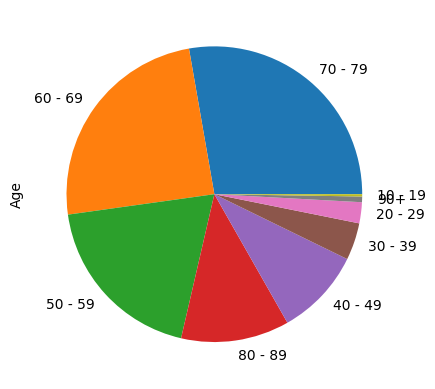

In [5]:
import matplotlib.pyplot as plt

counts = warfrain_data['Age'].value_counts()
counts.plot(kind='pie')

<Axes: >

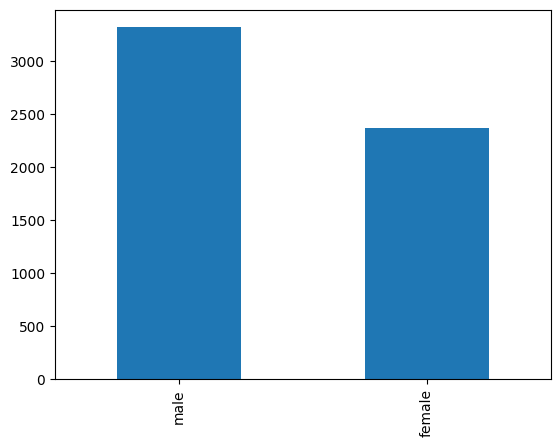

In [6]:
import matplotlib.pyplot as plt

counts = warfrain_data['Gender'].value_counts()
counts.plot(kind='bar')

<Axes: ylabel='Race (Reported)'>

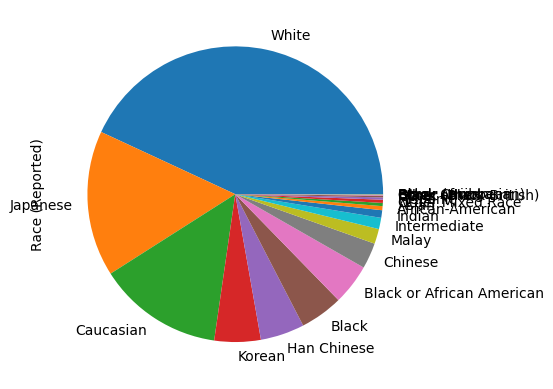

In [7]:
import matplotlib.pyplot as plt

counts = warfrain_data['Race (Reported)'].value_counts()
counts.plot(kind='pie')

Text(0, 0.5, 'INR on Reported Therapeutic Dose of Warfarin')

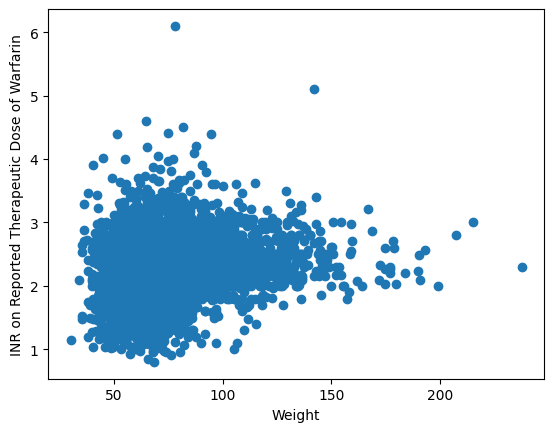

In [8]:
import matplotlib.pyplot as plt

plt.scatter(warfrain_data['Weight (kg)'],warfrain_data['INR on Reported Therapeutic Dose of Warfarin'])
plt.xlabel("Weight")
plt.ylabel("INR on Reported Therapeutic Dose of Warfarin")

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

warfrain_data_numeric = warfrain_data[["Height (cm)","Weight (kg)","Therapeutic Dose of Warfarin","INR on Reported Therapeutic Dose of Warfarin"]]
step1_imputer_num = SimpleImputer(missing_values=np.nan, strategy='mean')
step1_impute_mean = step1_imputer_num.fit_transform(warfrain_data_numeric)
step1_impute_df = pd.DataFrame(step1_impute_mean, columns=warfrain_data_numeric.columns + '_impute')
step1_impute_df = pd.concat([warfrain_data, step1_impute_df], axis=1)
warfrain_data = step1_impute_df.drop(["Height (cm)","Weight (kg)","Therapeutic Dose of Warfarin","INR on Reported Therapeutic Dose of Warfarin"], axis=1)
warfrain_data.head()


,Gender,Race (Reported),Age,Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Height (cm)_impute,Weight (kg)_impute,Therapeutic Dose of Warfarin_impute,INR on Reported Therapeutic Dose of Warfarin_impute
0,male,White,60 - 69,NaN,0.0,0.0,A/G,193.040,115.7,49.0,2.60
1,female,White,50 - 59,NaN,0.0,0.0,A/A,176.530,144.2,42.0,2.15
2,female,White,40 - 49,NaN,0.0,0.0,G/G,162.560,77.1,53.0,1.90
3,male,White,60 - 69,NaN,0.0,0.0,A/G,182.245,90.7,28.0,2.40
4,male,White,50 - 59,NaN,0.0,0.0,A/G,167.640,72.6,42.0,1.90


In [10]:
warfrain_data_category = warfrain_data[["Race (Reported)", "Age","Gender","Diabetes","Simvastatin (Zocor)","Amiodarone (Cordarone)","VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T"]]
step1_imputer_category = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
step1_impute_fre = step1_imputer_category.fit_transform(warfrain_data_category)
step1_impute_df = pd.DataFrame(step1_impute_fre, columns=warfrain_data_category.columns + '_impute')
step1_impute_df = pd.concat([warfrain_data, step1_impute_df], axis=1)
warfrain_data = step1_impute_df.drop(["Race (Reported)", "Age","Gender","Diabetes","Simvastatin (Zocor)","Amiodarone (Cordarone)","VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T"], axis=1)
warfrain_data.head()

,Height (cm)_impute,Weight (kg)_impute,Therapeutic Dose of Warfarin_impute,INR on Reported Therapeutic Dose of Warfarin_impute,Race (Reported)_impute,Age_impute,Gender_impute,Diabetes_impute,Simvastatin (Zocor)_impute,Amiodarone (Cordarone)_impute,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T_impute
0,193.040,115.7,49.0,2.60,White,60 - 69,male,0.0,0.0,0.0,A/G
1,176.530,144.2,42.0,2.15,White,50 - 59,female,0.0,0.0,0.0,A/A
2,162.560,77.1,53.0,1.90,White,40 - 49,female,0.0,0.0,0.0,G/G
3,182.245,90.7,28.0,2.40,White,60 - 69,male,0.0,0.0,0.0,A/G
4,167.640,72.6,42.0,1.90,White,50 - 59,male,0.0,0.0,0.0,A/G


In [11]:
warfrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Height (cm)_impute                                                        5700 non-null   float64
 1   Weight (kg)_impute                                                        5700 non-null   float64
 2   Therapeutic Dose of Warfarin_impute                                       5700 non-null   float64
 3   INR on Reported Therapeutic Dose of Warfarin_impute                       5700 non-null   float64
 4   Race (Reported)_impute                                                    5700 non-null   object 
 5   Age_impute                                                                5700 non-null   object 
 6   Gender_impute                                                   

In [12]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the categorical column and transform it
warfrain_data["Race (Reported)_impute"] = le.fit_transform(warfrain_data["Race (Reported)_impute"])
joblib.dump(le, 'my_le_race.joblib')
warfrain_data["Age_impute"] = le.fit_transform(warfrain_data["Age_impute"])
joblib.dump(le, 'my_le_age.joblib')
warfrain_data["Gender_impute"] = le.fit_transform(warfrain_data["Gender_impute"])
joblib.dump(le, 'my_le_gender.joblib')
warfrain_data["Diabetes_impute"] = le.fit_transform(warfrain_data["Diabetes_impute"])
joblib.dump(le, 'my_le_dia.joblib')
warfrain_data["Simvastatin (Zocor)_impute"] = le.fit_transform(warfrain_data["Simvastatin (Zocor)_impute"])
joblib.dump(le, 'my_le_sim.joblib')
warfrain_data["Amiodarone (Cordarone)_impute"] = le.fit_transform(warfrain_data["Amiodarone (Cordarone)_impute"])
joblib.dump(le, 'my_le_ami.joblib')
warfrain_data["VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T_impute"] = le.fit_transform(warfrain_data["VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T_impute"])
joblib.dump(le, 'my_le_vk.joblib')

# Display the resulting DataFrame
warfrain_data.head()
warfrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Height (cm)_impute                                                        5700 non-null   float64
 1   Weight (kg)_impute                                                        5700 non-null   float64
 2   Therapeutic Dose of Warfarin_impute                                       5700 non-null   float64
 3   INR on Reported Therapeutic Dose of Warfarin_impute                       5700 non-null   float64
 4   Race (Reported)_impute                                                    5700 non-null   int64  
 5   Age_impute                                                                5700 non-null   int64  
 6   Gender_impute                                                   

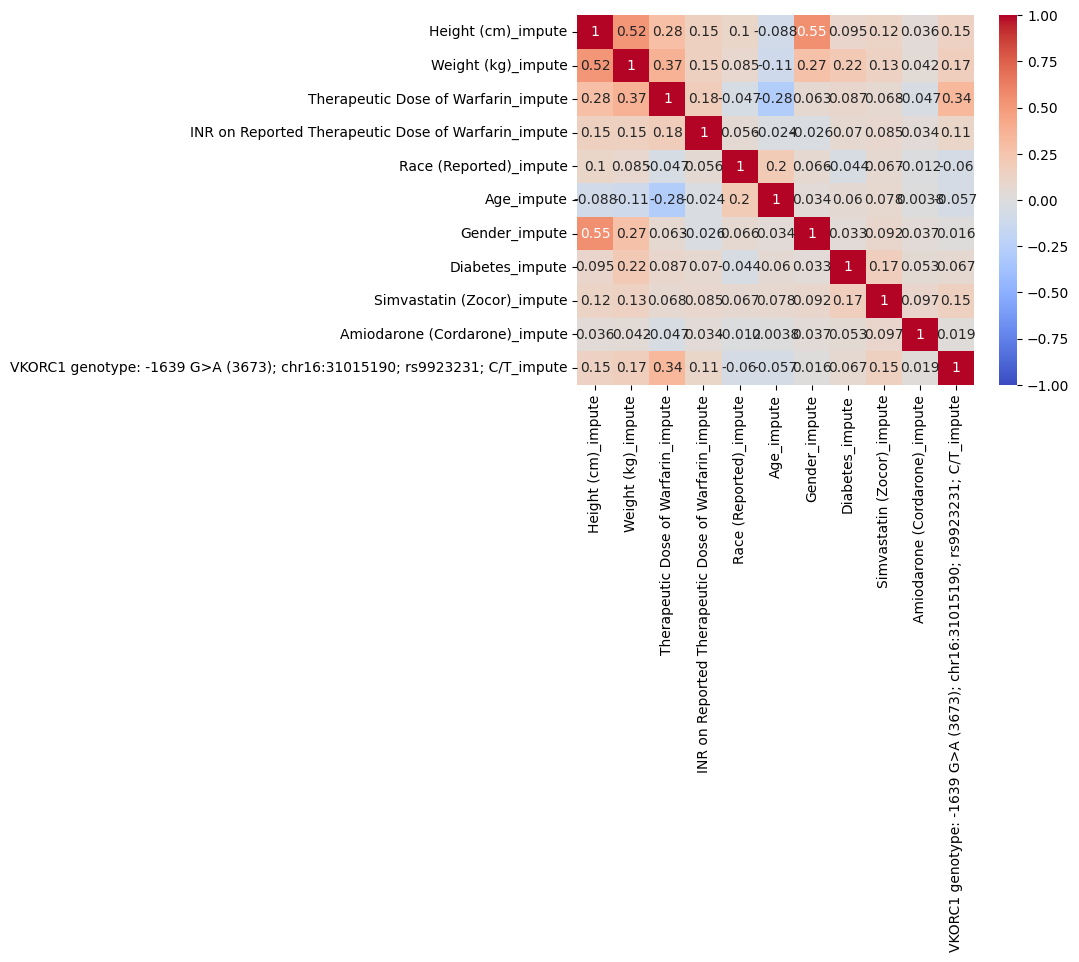

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = warfrain_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

In [14]:
import pandas as pd
import statsmodels.api as sm


# Create a linear regression model
X = warfrain_data[["Race (Reported)_impute", "Age_impute","Gender_impute","Diabetes_impute","Simvastatin (Zocor)_impute","Amiodarone (Cordarone)_impute","VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T_impute"]]
y = warfrain_data['Therapeutic Dose of Warfarin_impute']
model = sm.OLS(y, X).fit()

# Calculate Cook's distance for each data point
influence = model.get_influence()
cd, _ = influence.cooks_distance

# Identify data points with Cook's distance above a certain threshold
threshold = 4/(len(warfrain_data)-len(X.columns)-1)
anomalies = warfrain_data[cd > threshold]

# Display the anomalies
print(anomalies.info())
anomalies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 10 to 5686
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Height (cm)_impute                                                        300 non-null    float64
 1   Weight (kg)_impute                                                        300 non-null    float64
 2   Therapeutic Dose of Warfarin_impute                                       300 non-null    float64
 3   INR on Reported Therapeutic Dose of Warfarin_impute                       300 non-null    float64
 4   Race (Reported)_impute                                                    300 non-null    int64  
 5   Age_impute                                                                300 non-null    int64  
 6   Gender_impute                                                   

,Height (cm)_impute,Weight (kg)_impute,Therapeutic Dose of Warfarin_impute,INR on Reported Therapeutic Dose of Warfarin_impute,Race (Reported)_impute,Age_impute,Gender_impute,Diabetes_impute,Simvastatin (Zocor)_impute,Amiodarone (Cordarone)_impute,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T_impute
10,180.34,142.9,97.0,2.364438,20,5,1,0,0,0,2
32,180.34,120.2,88.0,2.260000,20,2,1,0,0,0,2
100,152.40,55.8,16.0,2.700000,20,7,0,0,1,0,2
171,172.72,70.3,16.0,1.900000,20,7,1,0,0,1,1
215,172.72,102.5,84.0,2.800000,20,3,1,0,0,0,2


In [15]:
warfrain_data = warfrain_data[~warfrain_data.index.isin(anomalies.index)]
warfrain_data.head(15)
warfrain_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 0 to 5699
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Height (cm)_impute                                                        5400 non-null   float64
 1   Weight (kg)_impute                                                        5400 non-null   float64
 2   Therapeutic Dose of Warfarin_impute                                       5400 non-null   float64
 3   INR on Reported Therapeutic Dose of Warfarin_impute                       5400 non-null   float64
 4   Race (Reported)_impute                                                    5400 non-null   int64  
 5   Age_impute                                                                5400 non-null   int64  
 6   Gender_impute                                                   

In [16]:
from sklearn.model_selection import train_test_split

y = warfrain_data['Therapeutic Dose of Warfarin_impute']
warfrain_data = warfrain_data.drop('Therapeutic Dose of Warfarin_impute', axis=1)

# Assuming you have X and y data arrays
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(warfrain_data, y, test_size=0.2, random_state=42)

# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays to check the split
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3456, 10)
Validation set shape: (864, 10)
Test set shape: (1080, 10)


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create a min-max scaler object
scaler = MinMaxScaler()

# Scale the input data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)


In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression


# Create a linear regression model
lrn_model = LinearRegression(fit_intercept=True)

# Fit the model using the data
lrn_model.fit(X_train_scaled, y_train)


LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_lr = lrn_model.predict(X_train_scaled)

# Calculate mean squared error (MSE)
mse_lr = mean_squared_error(y_train, y_pred_lr)
print("MSE: {:.2f}".format(mse_lr))

# Calculate R-squared (coefficient of determination)
r2_lr = r2_score(y_train, y_pred_lr)
print("R-squared: {:.2f}".format(r2_lr))

mae_lr = mean_absolute_error(y_train, y_pred_lr)
print("MAE: {:.2f}".format(mae_lr))

MSE: 118.43
R-squared: 0.32
MAE: 8.45


In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_lrt = lrn_model.predict(X_test_scaled)

# Calculate mean squared error (MSE)
mse_lrt = mean_squared_error(y_test, y_pred_lrt)
print("MSE: {:.2f}".format(mse_lrt))

# Calculate R-squared (coefficient of determination)
r2_lrt = r2_score(y_test, y_pred_lrt)
print("R-squared: {:.2f}".format(r2_lrt))

mae_lrt = mean_absolute_error(y_test, y_pred_lrt)
print("MAE: {:.2f}".format(mae_lrt))

MSE: 128.33
R-squared: 0.25
MAE: 8.78


In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred_lrv = lrn_model.predict(X_val_scaled)


# Calculate mean squared error (MSE)
mse_lrv = mean_squared_error(y_val, y_pred_lrv)
print("MSE: {:.2f}".format(mse_lrv))

# Calculate R-squared (coefficient of determination)
r2_lrv = r2_score(y_val, y_pred_lrv)
print("R-squared: {:.2f}".format(r2_lrv))

mae_lrv = mean_absolute_error(y_val, y_pred_lrv)
print("MAE: {:.2f}".format(mae_lrv))

MSE: 136.09
R-squared: 0.29
MAE: 9.03


In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the Lasso model
lasso = Lasso()

# Define the hyperparameters grid to search over
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lasso, params, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
lasso_best = grid_search.best_estimator_

print("Best hyperparameters:", best_params)


Best hyperparameters: {'alpha': 0.001}


In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred_lasso = lasso_best.predict(X_train_scaled)

# Calculate mean squared error (MSE)
mse_lasso = mean_squared_error(y_train, y_pred_lasso)
print("MSE: {:.2f}".format(mse_lasso))

# Calculate R-squared (coefficient of determination)
r2_lasso = r2_score(y_train, y_pred_lasso)
print("R-squared: {:.2f}".format(r2_lasso))

mae_lasso = mean_absolute_error(y_train, y_pred_lasso)
print("MAE: {:.2f}".format(mae_lasso))

MSE: 118.43
R-squared: 0.32
MAE: 8.45


In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred_lassot = lasso_best.predict(X_test_scaled)

# Calculate mean squared error (MSE)
mse_lassot = mean_squared_error(y_test, y_pred_lassot)
print("MSE: {:.2f}".format(mse_lassot))

# Calculate R-squared (coefficient of determination)
r2_lassot = r2_score(y_test, y_pred_lassot)
print("R-squared: {:.2f}".format(r2_lassot))

mae_lassot = mean_absolute_error(y_test, y_pred_lassot)
print("MAE: {:.2f}".format(mae_lassot))

MSE: 128.23
R-squared: 0.25
MAE: 8.77


In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_lassov = lasso_best.predict(X_val_scaled)

# Calculate mean squared error (MSE)
mse_lassov = mean_squared_error(y_val, y_pred_lassov)
print("MSE: {:.2f}".format(mse_lassov))

# Calculate R-squared (coefficient of determination)
r2_lassov = r2_score(y_val, y_pred_lassov)
print("R-squared: {:.2f}".format(r2_lassov))

mae_lassov = mean_absolute_error(y_val, y_pred_lassov)
print("MAE: {:.2f}".format(mae_lassov))

MSE: 136.04
R-squared: 0.29
MAE: 9.03


In [26]:
from sklearn.tree import DecisionTreeRegressor ## import the DecisionTree Function

params = {'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
          'max_depth': [5,10,20,30,40,50],
          'min_samples_split':[5,10,15,20,25]}

dtree_model = DecisionTreeRegressor(random_state=42) ## Initialize the class
dtree_model.fit(X_train_scaled, y_train) # feed the training data X, and label Y for supervised learning

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(dtree_model, params, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_dtmodel = grid_search.best_estimator_

print("Best hyperparameters:", best_params)


Best hyperparameters: {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 20}


In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_dt = best_dtmodel.predict(X_train_scaled)

# Calculate mean squared error (MSE)
mse_dt = mean_squared_error(y_train, y_pred_dt)
print("MSE: {:.2f}".format(mse_dt))

# Calculate R-squared (coefficient of determination)
r2_dt = r2_score(y_train, y_pred_dt)
print("R-squared: {:.2f}".format(r2_dt))

mae_dt = mean_absolute_error(y_train, y_pred_dt)
print("MAE: {:.2f}".format(mae_dt))

MSE: 119.30
R-squared: 0.32
MAE: 8.20


In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_dtt = best_dtmodel.predict(X_test_scaled)

# Calculate mean squared error (MSE)
mse_dtt = mean_squared_error(y_test, y_pred_dtt)
print("MSE: {:.2f}".format(mse_dtt))

# Calculate R-squared (coefficient of determination)
r2_dtt = r2_score(y_test, y_pred_dtt)
print("R-squared: {:.2f}".format(r2_dtt))

mae_dtt = mean_absolute_error(y_test, y_pred_dtt)
print("MAE: {:.2f}".format(mae_dtt))

MSE: 129.65
R-squared: 0.24
MAE: 8.56


In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_dtv = best_dtmodel.predict(X_val_scaled)

# Calculate mean squared error (MSE)
mse_dtv = mean_squared_error(y_val, y_pred_dtv)
print("MSE: {:.2f}".format(mse_dtv))

# Calculate R-squared (coefficient of determination)
r2_dtv = r2_score(y_val, y_pred_dtv)
print("R-squared: {:.2f}".format(r2_dtv))

mae_dtv = mean_absolute_error(y_val, y_pred_dtv)
print("MAE: {:.2f}".format(mae_dtv))

MSE: 146.44
R-squared: 0.23
MAE: 9.14


In [30]:
from sklearn.svm import SVR

params = {'kernel': ["linear", "poly", "rbf", "sigmoid"],
          'C': [0.5,1,2,3,4,5,10,20]}

svr = SVR()
svr.fit(X_train_scaled, y_train) # feed the training data X, and label Y for supervised learning

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(svr, params, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_svr = grid_search.best_estimator_

print("Best hyperparameters:", best_params)





Best hyperparameters: {'C': 4, 'kernel': 'rbf'}


In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_svr = best_svr.predict(X_train_scaled)

# Calculate mean squared error (MSE)
mse_svr = mean_squared_error(y_train, y_pred_svr)
print("MSE: {:.2f}".format(mse_svr))

# Calculate R-squared (coefficient of determination)
r2_svr= r2_score(y_train, y_pred_svr)
print("R-squared: {:.2f}".format(r2_svr))

mae_svr= mean_absolute_error(y_train, y_pred_svr)
print("MAE: {:.2f}".format(mae_svr))

MSE: 112.66
R-squared: 0.35
MAE: 8.12


In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_svrt = best_svr.predict(X_test_scaled)

# Calculate mean squared error (MSE)
mse_svrt = mean_squared_error(y_test, y_pred_svrt)
print("MSE: {:.2f}".format(mse_svrt))

# Calculate R-squared (coefficient of determination)
r2_svrt= r2_score(y_test, y_pred_svrt)
print("R-squared: {:.2f}".format(r2_svrt))

mae_svrt= mean_absolute_error(y_test, y_pred_svrt)
print("MAE: {:.2f}".format(mae_svrt))

MSE: 119.66
R-squared: 0.30
MAE: 8.37


In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_svrv = best_svr.predict(X_val_scaled)

# Calculate mean squared error (MSE)
mse_svrv = mean_squared_error(y_val, y_pred_svrv)
print("MSE: {:.2f}".format(mse_svrv))

# Calculate R-squared (coefficient of determination)
r2_svrv= r2_score(y_val, y_pred_svrv)
print("R-squared: {:.2f}".format(r2_svrv))

mae_svrv= mean_absolute_error(y_val, y_pred_svrv)
print("MAE: {:.2f}".format(mae_svrv))

MSE: 133.35
R-squared: 0.30
MAE: 8.78


In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

# Define MLPRegressor object
mlp = MLPRegressor()
mlp.fit(X_train_scaled, y_train) 

# Create a GridSearchCV object with 5-fold cross-validation

# Define hyperparameters for grid search
params= {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.001, 0.01, 0.1],
    'max_iter': [10,20,30,50,100]
}

grid_search = GridSearchCV(mlp, params, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_mlp = grid_search.best_estimator_

print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.p

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'max_iter': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_mlpt = best_mlp.predict(X_test_scaled)

# Calculate mean squared error (MSE)
mse_mlpt = mean_squared_error(y_test, y_pred_mlpt)
print("MSE: {:.2f}".format(mse_mlpt))

# Calculate R-squared (coefficient of determination)
r2_mlpt = r2_score(y_test, y_pred_mlpt)
print("R-squared: {:.2f}".format(r2_mlpt))

mae_mlpt = mean_absolute_error(y_test, y_pred_mlpt)
print("MAE: {:.2f}".format(mae_mlpt))

MSE: 125.86
R-squared: 0.26
MAE: 8.66


In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_mlp = best_mlp.predict(X_train_scaled)

# Calculate mean squared error (MSE)
mse_mlp = mean_squared_error(y_train, y_pred_mlp)
print("MSE: {:.2f}".format(mse_mlp))

# Calculate R-squared (coefficient of determination)
r2_mlp = r2_score(y_train, y_pred_mlp)
print("R-squared: {:.2f}".format(r2_mlp))

mae_mlp = mean_absolute_error(y_train, y_pred_mlp)
print("MAE: {:.2f}".format(mae_mlp))

MSE: 113.58
R-squared: 0.35
MAE: 8.24


In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on test data using the trained model
y_pred_mlpv = best_mlp.predict(X_val_scaled)

# Calculate mean squared error (MSE)
mse_mlpv = mean_squared_error(y_val, y_pred_mlpv)
print("MSE: {:.2f}".format(mse_mlpv))

# Calculate R-squared (coefficient of determination)
r2_mlpv = r2_score(y_val, y_pred_mlpv)
print("R-squared: {:.2f}".format(r2_mlpv))

mae_mlpv = mean_absolute_error(y_val, y_pred_mlpv)
print("MAE: {:.2f}".format(mae_mlpv))

MSE: 132.89
R-squared: 0.30
MAE: 8.87


In [38]:
import pickle

# Save the model to a file using pickle
with open('lrn_model.pkl', 'wb') as file:
    pickle.dump(lrn_model, file)

with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso_best, file)

with open('dt_model.pkl', 'wb') as file:
    pickle.dump(best_dtmodel, file)

with open('svr_model.pkl', 'wb') as file:
    pickle.dump(best_svr, file)

with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(best_mlp, file)

In [39]:
from sklearn.preprocessing import LabelEncoder

import joblib

# Load the saved label encoder from the .joblib file
encoder = joblib.load('my_le_gender.joblib')
# Print the classes that the encoder has learned
print(encoder.classes_)

# Use the label encoder to encode new categorical values
new_category = "male"
encoded_category = encoder.transform([new_category])[0]

print('Encoded category:', encoded_category)

['female' 'male']
Encoded category: 1


In [40]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [41]:
import gradio as gr
import numpy as np
import pickle 
import joblib

def predict(Height,Weight,INR,Race,Age,gender,Diabetes,Simvastatin,Amiodarone,VKORC1,
            ml_model):
  
  age_encoder = joblib.load('my_le_age.joblib')
  en_age = age_encoder.transform([Age])[0]
  race_encoder = joblib.load('my_le_race.joblib')
  en_race = race_encoder.transform([Race])[0]
  gen_encoder = joblib.load('my_le_gender.joblib')
  en_gen = gen_encoder.transform([gender])[0]
  sim_encoder = joblib.load('my_le_sim.joblib')
  en_sim = sim_encoder.transform([Simvastatin])[0]
  ami_encoder = joblib.load('my_le_ami.joblib')
  en_ami = ami_encoder.transform([Amiodarone])[0]
  vk_encoder = joblib.load('my_le_vk.joblib')
  en_vk = vk_encoder.transform([VKORC1])[0]
  input_features=np.array([Height,Weight,INR,en_race,en_age,en_gen,Diabetes,en_sim,en_ami,en_vk]).reshape(1,-1)
  norm_features = scaler.fit_transform(input_features)

  if(ml_model == 'Linear'):
    with open('lrn_model.pkl', 'rb') as file:
      lrn_model = pickle.load(file)
    res = lrn_model.predict(norm_features)[0]
    
  return res
  
  
  return en_gen
    

Height = gr.inputs.Number(label='Height (cm)')
Weight = gr.inputs.Number(label='Weight (kg)')
INR = gr.inputs.Number(label='INR on Reported Therapeutic Dose of Warfarin')
Race = gr.inputs.Dropdown(['African-American','Asian','Black','Black African','Black Caribbean',
 'Black or African American','Black other','Caucasian','Chinese',
 'Han Chinese','Hispanic','Indian','Intermediate' ,'Japanese', 'Korean',
 'Malay', 'Other' ,'Other (Black British)' ,'Other (Hungarian)',
 'Other Mixed Race' ,'White' ,'other'], label='Race')
Age = gr.inputs.Dropdown(['10 - 19','20 - 29','30 - 39','40 - 49','50 - 59','60 - 69','70 - 79','80 - 89','90+'],label='Age')
gender = gr.inputs.Dropdown(["male", "female"], label="Gender")
Diabetes = gr.inputs.Number(label='Diabetes')
Simvastatin = gr.inputs.Number(label='Simvastatin (Zocor)')
Amiodarone = gr.inputs.Number(label='Amiodarone (Cordarone)')
VKORC1 = gr.inputs.Dropdown(['A/A','A/G','G/G'], label='VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T')
ml_model = gr.inputs.Dropdown(["Linear", "SVRegressor", "Decision Trees Regressor","Lasso Regression", "Neural Network"], label="ML Model")
outputs = [
    gr.outputs.Textbox(label="Dose"),
]
# Create interface
interface = gr.Interface(
    fn=predict,
    inputs=[Height,Weight,INR,Race,Age,gender,Diabetes,Simvastatin,Amiodarone,VKORC1,
            ml_model],
    outputs=outputs
)

# Launch interface
interface.launch()






/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [42]:
import pickle

def predict(Height,Weight,INR,Race,Age,gender,Diabetes,Simvastatin,Amiodarone,VKORC1,
            ml_model):
  age_encoder = joblib.load('my_le_age.joblib')
  en_age = age_encoder.transform([Age])[0]
  race_encoder = joblib.load('my_le_race.joblib')
  en_race = race_encoder.transform([Race])[0]
  gen_encoder = joblib.load('my_le_gender.joblib')
  en_gen = gen_encoder.transform([gender])[0]
  sim_encoder = joblib.load('my_le_sim.joblib')
  en_sim = sim_encoder.transform([Simvastatin])[0]
  ami_encoder = joblib.load('my_le_ami.joblib')
  en_ami = ami_encoder.transform([Amiodarone])[0]
  vk_encoder = joblib.load('my_le_vk.joblib')
  en_vk = vk_encoder.transform([VKORC1])[0]
  input_features=np.array([Height,Weight,INR,en_race,en_age,en_gen,Diabetes,en_sim,en_ami,en_vk]).reshape(1,-1)
  norm_features = scaler.fit_transform(input_features)

  if(ml_model == 'Linear'):
    with open('lrn_model.pkl', 'rb') as file:
      lrn_model = pickle.load(file)
    res = lrn_model.predict(norm_features)[0]
    
  return res


print(predict(193.040,115.7,2.60,"White",	"60 - 69",	"male",	0.0,	0.0,	0.0	,'A/G',"Linear"))

15.658576791463565


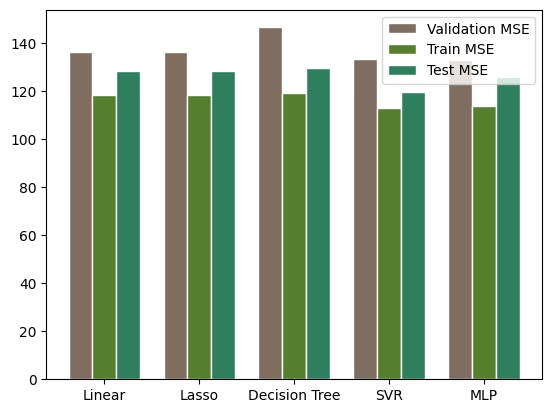

In [43]:
import numpy as np
import matplotlib.pyplot as plt

model_list = np.array(["Linear","Lasso","Decision Tree","SVR", "MLP"])
val_mse = np.array([mse_lrv,mse_lassov,mse_dtv,mse_svrv,mse_mlpv])
train_mse = np.array([mse_lr,mse_lasso,mse_dt,mse_svr,mse_mlp])
test_mse = np.array([mse_lrt,mse_lassot,mse_dtt,mse_svrt,mse_mlpt])

val_r2 = np.array([r2_lrv,r2_lassov,r2_dtv,r2_svrv,r2_mlpv])
train_r2 = np.array([r2_lr,r2_lasso,mse_dt,r2_svr,r2_mlp])
test_r2 = np.array([r2_lrt,r2_lassot,r2_dtt,r2_svrt,r2_mlpt])

val_mae = np.array([mae_lrv,mae_lassov,mae_dtv,mae_svrv,mae_mlpv])
train_mae = np.array([mae_lr,mae_lasso,mae_dt,mae_svr,mae_mlp])
test_mae = np.array([mae_lrt,mae_lassot,mae_dtt,mae_svrt,mae_mlpt])

# Set the width of each bar chart
bar_width = 0.25

# Set the position of each bar on the x-axis
r1 = np.arange(len(model_list))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the bar charts
plt.bar(r1, val_mse, color='#7f6d5f', width=bar_width, edgecolor='white', label='Validation MSE')
plt.bar(r2, train_mse, color='#557f2d', width=bar_width, edgecolor='white', label='Train MSE')
plt.bar(r3, test_mse, color='#2d7f5e', width=bar_width, edgecolor='white', label='Test MSE')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width for r in range(len(model_list))], model_list)

# Add legend
plt.legend()

# Show the plot
plt.show()

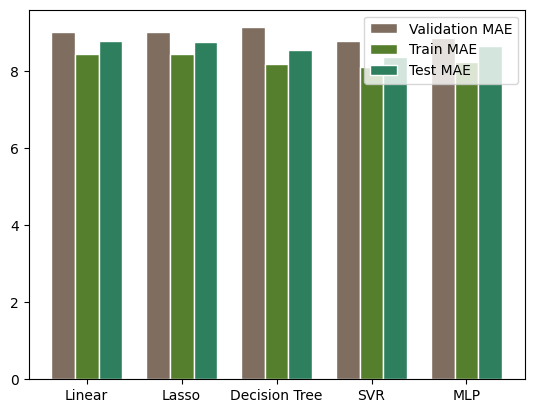

In [47]:
# Set the width of each bar chart
bar_width = 0.25

# Set the position of each bar on the x-axis
r1 = np.arange(len(model_list))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the bar charts
plt.bar(r1, val_mae, color='#7f6d5f', width=bar_width, edgecolor='white', label='Validation MAE')
plt.bar(r2, train_mae, color='#557f2d', width=bar_width, edgecolor='white', label='Train MAE')
plt.bar(r3, test_mae, color='#2d7f5e', width=bar_width, edgecolor='white', label='Test MAE')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width for r in range(len(model_list))], model_list)

# Add legend
plt.legend()

# Show the plot
plt.show()